In [21]:
#Useful tutorial: https://github.com/rowhitswami/Image-Classification-with-PyTorch
#Followed the approach from: https://medium.com/@vivekvscool/image-classification-cnn-with-pytorch-5b2cb9ef9476


#Import various PyTorch Utilities
#import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [22]:
#Create a dataset

#Dataset 1: http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

#Transformation for image
transform_ori = transforms.Compose([transforms.RandomResizedCrop(64),   #create 64x64 image
                                    transforms.RandomHorizontalFlip(),    #flipping the image horizontally
                                    transforms.ToTensor(),                 #convert the image to a Tensor
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  #normalize the image

#Load our dataset \\Documents\\MCIT\\Image-ML-Project\\HeadPoseImageDatabase
train_dataset = datasets.ImageFolder(root = '/Users/Krishna1/Documents/MCIT/Image-ML-Project/HeadPoseImageDatabase/Train',transform = transform_ori)

test_dataset = datasets.ImageFolder(root = '/Users/Krishna1/Documents/MCIT/Image-ML-Project/HeadPoseImageDatabase/Test',
                                    transform = transform_ori)


#Potential dataset 2: https://sites.google.com/site/nirdatabase/ (Pending approval)

In [35]:
#Make the dataset iterable
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset = train_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)      #Shuffle to create a mixed batches of 100 of cat & dog images

test_load = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = batch_size,
                                         shuffle = False)

In [36]:
#Show a batch of images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [37]:
# get some random training images
dataiter = iter(train_load)
images, labels = dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


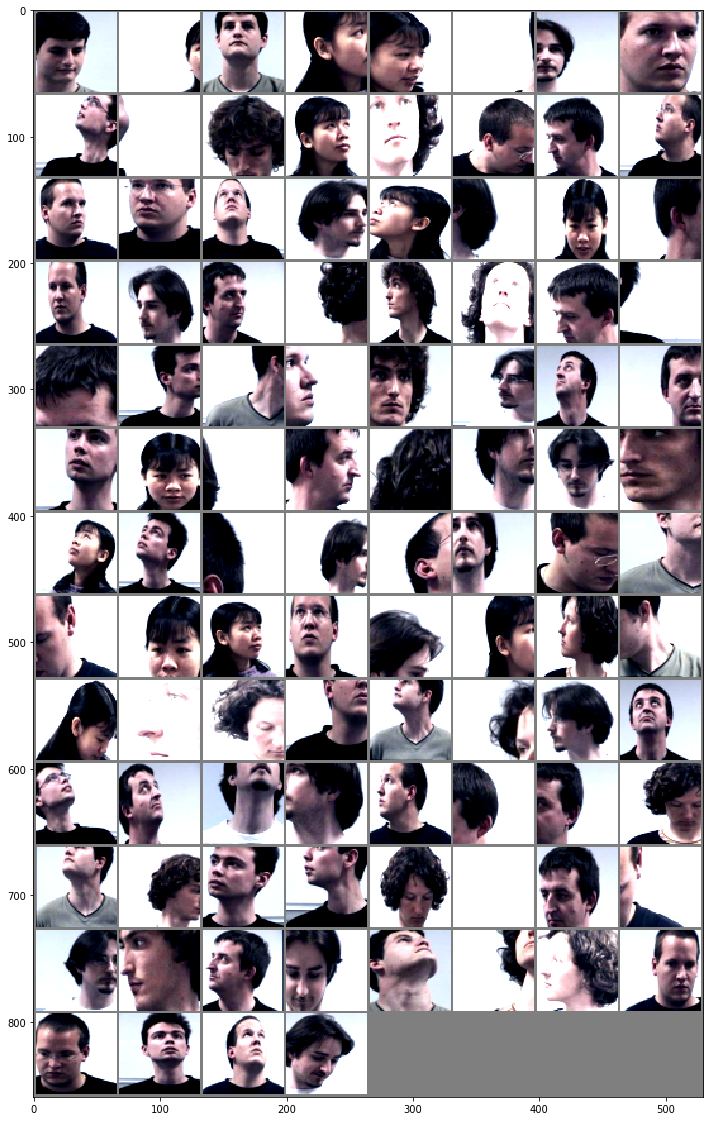

In [38]:
# show images
imshow(torchvision.utils.make_grid(images))

In [34]:
print('There are', (len(train_dataset)), 'images in the training dataset')
print('There are', (len(test_load)), 'images in the testing dataset')

There are 1488 images in the training dataset
There are 131 images in the testing dataset
